# Sentiment Analysis (News and Twitter Data)
# 1. Realtime data will be analyzed (After running the code at that instant news and twits will be fetched)
# 2. Data on certain topics will be analyzed
# Let's move towards imports

In [1]:
from newspaper import  Article
import newspaper
import pandas as pd
from textblob import TextBlob
from newspaper import Config
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
print("Done")

Done


# Fetching the articles

In [11]:
# experimenting with libs 

site = newspaper.build("https://edition.cnn.com/?refresh=1", memoize_articles=False)
# site = newspaper.build("https://www.bbc.com/news", memoize_articles=False)
# site = newspaper.build("https://www.foxnews.com/", memoize_articles=False)
# site = newspaper.build("https://news.sky.com/", memoize_articles=False)


# get list of article URLs
top_articles = site.article_urls()


ar = top_articles[:90]

In [12]:
len(top_articles)

637

In [48]:
# seeing whether the ariticle and summary method works 

# top_articles.remove('http://www.slideshare.net/Wisec/http-parameter-pollution-a-new-category-of-web-attacks')

nltk.download('punkt')

summaryList = []

ar1 = ar[1]


for article in ar:
    articles = Article(article,language="en")
    articles.download()
    articles.parse()
    articles.nlp()
    text = articles.summary
    summaryList.append(text)



# print(summaryList)

# covid data 

polarityList = []

for summary in summaryList:
    blob = TextBlob(summary)
    sentiment = blob.sentiment.polarity
    polarityList.append(sentiment)

print(polarityList)

# polarity 0 - neutral, 1 - positive, 2 - negative

In [2]:
# Writting changes and making a function

nltk.download('punkt')

newsLinks = ['https://edition.cnn.com/','https://www.foxnews.com/','https://www.bbc.com/news','https://news.sky.com/']
config = Config()

summaryList = []
polarity = []

userAgent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.62'
config.browser_user_agent = userAgent

def getDfForNews(newsNo):
    if newsNo > 4:
        return None
    site = newspaper.build(f"{newsLinks[newsNo]}", memoize_articles=False,config=config)
    top_articles = site.article_urls()
    ar = top_articles[:20]
    for article in ar:
        articles = Article(article,language="en")
        articles.download()
        articles.parse()
        articles.nlp()
        text = articles.summary
        summaryList.append(text)
    for summary in summaryList:
        blob = TextBlob(summary)
        sentiment = blob.sentiment.polarity
        polarity.append(sentiment)

    df1 = pd.DataFrame({'Summary Text':summaryList,'Polarity':polarity})
    summaryList.clear()
    polarity.clear()
    return df1

df11 = getDfForNews(1)

df11

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:

index_names = df11[ df11['Summary Text'] == 'Log in to comment on videos and join in on the fun.'].index

print(index_names)

df11.drop(index_names, inplace = True)

df11

# df11.to_csv("FoxNewsWeb.csv",index = 0)

Int64Index([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')


,Summary Text,Polarity
2,CrimeStay informed on everything from news abo...,0.525


In [3]:
df12 = getDfForNews(0)

df12



,Summary Text,Polarity
0,How relevant is this ad to you?\nVideo player ...,0.018750
1,A man went missing from a Carnival cruise ship...,-0.100000
2,CNN —You may have heard of atmospheric rivers ...,0.157576
3,"This season, they have gone on 28 flight missi...",0.210000
4,Callaghan O'Hare for the Washington Post/Getty...,0.177381
5,CNN —The official start to hurricane season is...,0.058796
6,A body is carried out of the Mudd neighborhood...,0.466667
7,“The government is obviously failing us and no...,-0.088000
8,CNN —The second half of hurricane season is he...,0.016667
9,Hurricanes are categorized by their wind speed...,0.023864


In [4]:
index_names = df12[ df12['Summary Text'] == ''].index

print(index_names)

df12.drop(index_names, inplace = True)

df12.to_csv('CNNWeb.csv')

df12

Int64Index([13], dtype='int64')


,Summary Text,Polarity
0,How relevant is this ad to you?\nVideo player ...,0.018750
1,A man went missing from a Carnival cruise ship...,-0.100000
2,CNN —You may have heard of atmospheric rivers ...,0.157576
3,"This season, they have gone on 28 flight missi...",0.210000
4,Callaghan O'Hare for the Washington Post/Getty...,0.177381
5,CNN —The official start to hurricane season is...,0.058796
6,A body is carried out of the Mudd neighborhood...,0.466667
7,“The government is obviously failing us and no...,-0.088000
8,CNN —The second half of hurricane season is he...,0.016667
9,Hurricanes are categorized by their wind speed...,0.023864


In [43]:
df13 = getDfForNews(2)

df13

,Summary Text,Polarity
0,Video caption: 'Victory is not the only thing ...,0.000000
1,Mass protests against strict Covid curbs have ...,0.250000
2,Video caption: Will the 2022 World Cup be 'car...,0.000000
3,"Not only victory, we need justice - Olena Zele...",0.000000
4,Armed men affiliated with Ethiopia's rebel Oro...,0.166667
5,The cost of living in both cities is now the j...,0.166667
6,The prince's godmother resigned after repeated...,0.008333
7,Many households are seeing their energy bills ...,0.211111
8,Video caption: The six-wheeled robots will del...,0.000000
9,A search effort is under way for dozens of peo...,0.166667


In [44]:
index_names = df13[ df13['Summary Text'] == ''].index

print(index_names)

df13.drop(index_names, inplace = True)

df13.to_csv('BBCWEB.csv')

df13

Int64Index([16], dtype='int64')


,Summary Text,Polarity
0,Video caption: 'Victory is not the only thing ...,0.000000
1,Mass protests against strict Covid curbs have ...,0.250000
2,Video caption: Will the 2022 World Cup be 'car...,0.000000
3,"Not only victory, we need justice - Olena Zele...",0.000000
4,Armed men affiliated with Ethiopia's rebel Oro...,0.166667
5,The cost of living in both cities is now the j...,0.166667
6,The prince's godmother resigned after repeated...,0.008333
7,Many households are seeing their energy bills ...,0.211111
8,Video caption: The six-wheeled robots will del...,0.000000
9,A search effort is under way for dozens of peo...,0.166667


In [46]:
df14 = getDfForNews(3)

df14 

,Summary Text,Polarity
0,Lady Susan Hussey resigned from her role in th...,0.218750
1,Lady Hussey served as Queen Elizabeth's lady i...,0.103968
2,Prime Minister Rishi Sunak has said whenever w...,0.004762
3,The trailer for Harry and Meghan's new documen...,0.012879
4,Belgium manager steps down after team knocked ...,0.061111
5,"After murdering 34-year-old Ms Morgan, Brown p...",0.200000
6,Ex-military chief says UK is 'at war' with Rus...,0.110119
7,A mega-tsunami on Mars could have been trigger...,-0.020833
8,New figures on lack of trust in police among b...,-0.072940
9,New technology to catch train fare dodgers is ...,0.219394


In [47]:
df14.to_csv("skyNewsWeb.csv")

In [45]:
# covid data 
df15 = pd.read_csv('covidNewsData.csv',index_col = 0)

df15

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Twitter spam obscures China COVID policy prote...,You won't have much success finding news of Ch...,https://www.engadget.com/twitter-spam-hides-ch...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-11-28T15:25:34Z,You won't have much success finding news of Ch...
1,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Twitter has stopped enforcing its COVID-19 mis...,Twitter's long-running effort to fight COVID-1...,https://www.engadget.com/twitter-stops-enforci...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-11-29T14:54:45Z,Twitter's long-running effort to fight COVID-1...
2,"{'id': 'wired', 'name': 'Wired'}",Brenda Stolyar,Cue Health Cue Reader Review: Accurate and Exp...,This at-home diagnostic Covid-19 test kit is r...,https://www.wired.com/review/cue-health-cue-re...,https://media.wired.com/photos/636eaa2bafd174d...,2022-11-14T15:00:00Z,Ive tried a dozen at-home Covid tests over the...
3,"{'id': 'wired', 'name': 'Wired'}",Aarian Marshall,The Pandemic Bike Boom Survives—in Cities That...,Covid lockdowns prompted a surge of new cyclis...,https://www.wired.com/story/the-pandemic-bike-...,https://media.wired.com/photos/636eed9792528f1...,2022-11-14T13:00:00Z,"In 18 years working in bicycles, Eric Bjorling..."
4,"{'id': 'the-verge', 'name': 'The Verge'}",Ash Parrish,"Wednesday’s top tech news: It’s-a me, another ...",A new Mario movie trailer shows off more of th...,https://www.theverge.com/2022/11/30/23485711/n...,https://cdn.vox-cdn.com/thumbor/0bQADUlS9SGs8l...,2022-11-30T10:02:34Z,Mario Mario and Luigi Mario in the new Mario m...
5,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,How China's Covid protests are being silenced,State media are going to great lengths to stop...,https://www.bbc.co.uk/news/world-asia-china-63...,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-28T22:11:21Z,China's censorship machine is going to great l...
6,"{'id': 'cnn', 'name': 'CNN'}",Jamie Gumbrecht,"Paxlovid reduces risk of long Covid, Veterans ...","Paxlovid, the antiviral pill that reduces the ...",https://www.cnn.com/2022/11/06/health/paxlovid...,https://media.cnn.com/api/v1/images/stellar/pr...,2022-11-06T21:10:18Z,"Paxlovid, the antiviral pill that reduces the ..."
7,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,China plans 'crackdown' after Covid protests,Warnings of a crackdown come as Chinese health...,https://www.bbc.co.uk/news/world-asia-china-63...,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-29T17:11:12Z,China's top security agency has called for a c...
8,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,China Xinjiang: Ten dead in Urumqi residential...,The blaze in Urumqi - under Covid restrictions...,https://www.bbc.co.uk/news/world-asia-china-63...,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-25T09:25:37Z,Ten people have died in a fire in flats in the...
9,"{'id': 'bbc-news', 'name': 'BBC News'}",NaN,Ros Atkins on... China's crackdown on Covid pr...,The BBC's Ros Atkins looks at how authorities ...,https://www.bbc.co.uk/news/av/63798874,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-11-30T00:33:47Z,"Not only victory, we need justice - Olena Zele..."


# For twitter data

In [9]:
df21 = pd.read_csv("CNN.csv")
df22 = pd.read_csv("FoxNews.csv")
df23 = pd.read_csv("BBCWorld.csv")
df24 = pd.read_csv("SkyNews.csv")

df21.drop('Unnamed: 0',axis=1)
df22.drop('Unnamed: 0',axis=1)
df23.drop('Unnamed: 0',axis=1)
df24.drop('Unnamed: 0',axis=1)

,Tweet Text,Likes,Time
0,Hailey Bieber is once again trying to make it ...,44,2022-11-29 18:45:06+00:00
1,As frustrated demonstrators take to the street...,80,2022-11-29 18:30:10+00:00
2,A Finnish brand is bringing high fashion to an...,72,2022-11-29 18:15:09+00:00
3,Iranian soccer great Ali Karimi has alleged th...,220,2022-11-29 18:00:15+00:00
4,Twitter said it will no longer enforce its lon...,417,2022-11-29 17:45:09+00:00
...,...,...,...
95,The families of Iran’s World Cup soccer team h...,4780,2022-11-28 20:00:15+00:00
96,Cyber Monday is now projected to be the bigges...,246,2022-11-28 19:51:51+00:00
97,Merriam-Webster’s word of the year is “gasligh...,786,2022-11-28 19:37:09+00:00
98,"More than 10,000 sippy cups and bottles produc...",143,2022-11-28 19:33:39+00:00


In [17]:
# covid twits
d3 = pd.read_csv('covidTwit.csv')

d3

,Tweet Text,Likes,Time
0,Hailey Bieber is once again trying to make it ...,44,2022-11-29 18:45:06+00:00
1,As frustrated demonstrators take to the street...,80,2022-11-29 18:30:10+00:00
2,A Finnish brand is bringing high fashion to an...,72,2022-11-29 18:15:09+00:00
3,Iranian soccer great Ali Karimi has alleged th...,220,2022-11-29 18:00:15+00:00
4,Twitter said it will no longer enforce its lon...,417,2022-11-29 17:45:09+00:00
...,...,...,...
95,The families of Iran’s World Cup soccer team h...,4780,2022-11-28 20:00:15+00:00
96,Cyber Monday is now projected to be the bigges...,246,2022-11-28 19:51:51+00:00
97,Merriam-Webster’s word of the year is “gasligh...,786,2022-11-28 19:37:09+00:00
98,"More than 10,000 sippy cups and bottles produc...",143,2022-11-28 19:33:39+00:00


In [ ]:

twitPolarityList = []

for text in df21['Tweet Text']:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    twitPolarityList.append(sentiment)

twitPolarityList[:90]

# Making a final CSV

In [20]:
# for random data (CNN)

df = pd.DataFrame({'Summary Text':summaryList[:90],'Sentiment Polarity':polarityList[:90],'Twit_text': df21['Tweet Text'][:90],'Sentiment Polarity Twitter': twitPolarityList[:90]})

df

,Summary Text,Sentiment Polarity,Twit_text,Sentiment Polarity Twitter
0,How relevant is this ad to you?\nVideo player ...,0.018750,Hailey Bieber is once again trying to make it ...,-0.033333
1,A man went missing from a Carnival cruise ship...,-0.100000,As frustrated demonstrators take to the street...,-0.266667
2,From the moment Emma Corrin appears on screen ...,-0.021212,A Finnish brand is bringing high fashion to an...,0.130000
3,"Written by Jack Guy Christian Edwards, CNNArou...",0.364286,Iranian soccer great Ali Karimi has alleged th...,0.233333
4,"Written by Oscar Holland, CNNWhen celebrated p...",0.065152,Twitter said it will no longer enforce its lon...,0.033333
...,...,...,...,...
85,But it’s coming under huge pressure from devel...,0.255432,Helena Bonham Carter is coming to the defense ...,0.000000
86,"Aisha Salaudeen , CNN Written byIn a coffee sh...",-0.063333,"In a media conference on Monday, Tyler Adams w...",0.000000
87,Bethlehem and Jerusalem CNN —At least six Pale...,-0.140404,Online Black Friday sales in the United States...,-0.022917
88,"Basel Christmas Market, SwitzerlandBasel Chris...",0.252667,The label on a cup of Velveeta’s microwaveable...,-0.188889


# Saving as CSV

In [17]:
df.to_csv("Analysis.csv")

# Data Visualization (Part 1)

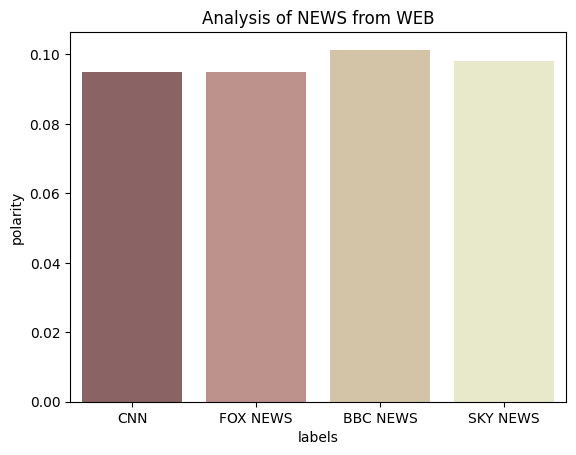

In [22]:
# TODO: Bar graph (mean)

plt.title("Analysis of NEWS from WEB")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(x=pltdf.labels,y=pltdf.polarity,palette='pink')

plt.show()

In [27]:
# function to fetch positive/negative values

def getValues(req,df):
    if req == 1:
        y = df[df['Polarity'] > 0] 
        return y
    elif req == -1:
        y = df[df['Polarity'] < 0] 
        return y
    else:
        return

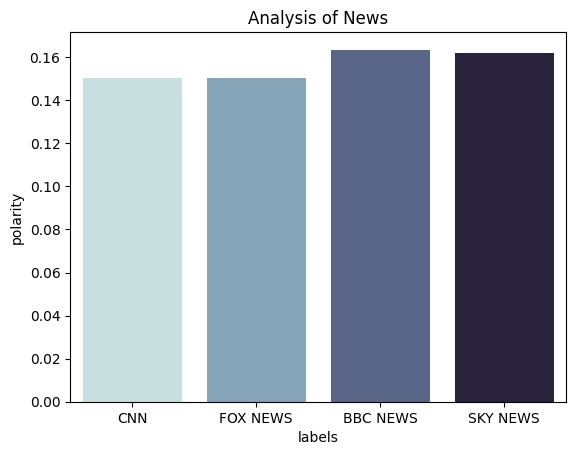

In [53]:
# TODO: Bar graph (Negative values)

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

plt.title("Analysis of News")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(x=pltdf.labels,y=pltdf.polarity,palette="ch:start=.2,rot=-.3")

plt.show()

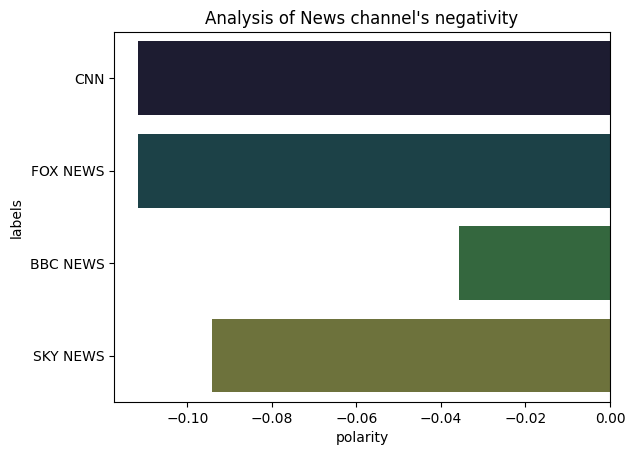

In [56]:
# TODO: Bar graph (Negative values)

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(-1,y0)

y1 = getValues(-1,y1)

y2 = getValues(-1,y2)

y3 = getValues(-1,y3)

plt.title("Analysis of News channel's negativity")

x = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]


y = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]

pltdf = pd.DataFrame({'labels':x,'polarity':y})


sns.barplot(y=pltdf.labels,x=pltdf.polarity,palette=sns.color_palette("cubehelix", 8))

plt.show()

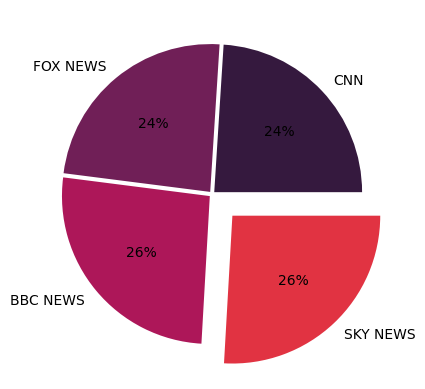

In [51]:
#  TODO: Pie Chart

y0 = pd.read_csv('CNNWeb.csv',index_col=0)
y1 = pd.read_csv('CNNWeb.csv',index_col=0)
y2 = pd.read_csv('BBCWEB.csv',index_col=0)
y3 = pd.read_csv('skyNewsWeb.csv',index_col=0)

y0 = getValues(1,y0)

y1 = getValues(1,y1)

y2 = getValues(1,y2)

y3 = getValues(1,y3)

data = [y0['Polarity'].mean(),y1['Polarity'].mean(),y2['Polarity'].mean(),y3['Polarity'].mean()]
labels = ["CNN","FOX NEWS","BBC NEWS","SKY NEWS"]
explode = [0.02,0.02,0.02,0.2]
colors = sns.color_palette("rocket")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

# Part 2